In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sb

In [161]:
data = pd.read_csv("application_train.csv")

In [162]:
data.head()

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1.0,0,0,0,0,1,1,Religion,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214079 entries, 0 to 214078
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   214079 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           214079 non-null  object 
 3   CODE_GENDER                  214079 non-null  object 
 4   FLAG_OWN_CAR                 214079 non-null  object 
 5   FLAG_OWN_REALTY              214079 non-null  object 
 6   CNT_CHILDREN                 214079 non-null  int64  
 7   AMT_INCOME_TOTAL             214079 non-null  float64
 8   AMT_CREDIT                   214079 non-null  float64
 9   AMT_ANNUITY                  214070 non-null  float64
 10  AMT_GOODS_PRICE              213906 non-null  float64
 11  NAME_TYPE_SUITE              213200 non-null  object 
 12  NAME_INCOME_TYPE             214079 non-null  object 
 13 

# Data Cleaning

'Unnamed:1'is a null data column, which need to be deleted for better analysis

In [164]:
del data["Unnamed: 1"]

Column'sk_id_curr' is a counter column and does not have any value, so I deleted it.

In [165]:
del data["SK_ID_CURR"]

In [166]:
Q1 = data['OWN_CAR_AGE'].quantile(0.25)
Q3 = data['OWN_CAR_AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['OWN_CAR_AGE'] >= lower_bound) & (data['OWN_CAR_AGE'] <= upper_bound)]

The multiple columns have missing values. Using median value of column to fill in.

In [167]:
med = data["AMT_ANNUITY"].median()
data["AMT_ANNUITY"].fillna(med, inplace=True)

In [168]:
med = data["AMT_GOODS_PRICE"].median()
data["AMT_GOODS_PRICE"].fillna(med, inplace=True)

In [169]:
med = data["CNT_FAM_MEMBERS"].median()
data["CNT_FAM_MEMBERS"].fillna(med, inplace=True)

Use mode() to fill in the categorical data

In [170]:
data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [171]:
data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69301 entries, 2 to 214078
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           69301 non-null  object 
 1   CODE_GENDER                  69301 non-null  object 
 2   FLAG_OWN_CAR                 69301 non-null  object 
 3   FLAG_OWN_REALTY              69301 non-null  object 
 4   CNT_CHILDREN                 69301 non-null  int64  
 5   AMT_INCOME_TOTAL             69301 non-null  float64
 6   AMT_CREDIT                   69301 non-null  float64
 7   AMT_ANNUITY                  69301 non-null  float64
 8   AMT_GOODS_PRICE              69301 non-null  float64
 9   NAME_TYPE_SUITE              69301 non-null  object 
 10  NAME_INCOME_TYPE             69301 non-null  object 
 11  NAME_EDUCATION_TYPE          69301 non-null  object 
 12  NAME_FAMILY_STATUS           69301 non-null  object 
 13  NAME_HOUSING_TYPE   

# Find the Outliners and Delete

Make a subset to deal with numerical data's outliners

In [173]:
subset = data.iloc[:,[4,5,6,7,8,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,34]]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69301 entries, 2 to 214078
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CNT_CHILDREN                 69301 non-null  int64  
 1   AMT_INCOME_TOTAL             69301 non-null  float64
 2   AMT_CREDIT                   69301 non-null  float64
 3   AMT_ANNUITY                  69301 non-null  float64
 4   AMT_GOODS_PRICE              69301 non-null  float64
 5   DAYS_BIRTH                   69301 non-null  int64  
 6   DAYS_EMPLOYED                69301 non-null  int64  
 7   DAYS_REGISTRATION            69301 non-null  int64  
 8   DAYS_ID_PUBLISH              69301 non-null  int64  
 9   OWN_CAR_AGE                  69301 non-null  float64
 10  FLAG_MOBIL                   69301 non-null  int64  
 11  FLAG_EMP_PHONE               69301 non-null  int64  
 12  FLAG_WORK_PHONE              69301 non-null  int64  
 13  FLAG_CONT_MOBILE    

In [174]:
subset.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260,-2531,26.0,...,1,0,1.0,0,0,0,0,0,0,0
6,1,171000.0,1560726.0,41301.0,1395000.0,-13778,-3130,-1213,-619,17.0,...,1,0,3.0,0,0,0,0,0,0,0
7,0,360000.0,1530000.0,42075.0,1530000.0,-18850,-449,-4597,-2379,8.0,...,0,0,2.0,0,0,0,0,1,1,0
13,1,225000.0,918468.0,28966.5,697500.0,-14086,-3028,-643,-4911,23.0,...,0,0,3.0,0,0,0,0,0,0,0
15,0,157500.0,299772.0,20160.0,247500.0,-8728,-1157,-3494,-1368,17.0,...,0,0,1.0,0,0,0,1,1,0,0


ABC management needs the analysis of their out loans, so our process of outliers finding focuses on money/amount that may influence the loans(including income or credits that customers have), preparing for further regression analysis.

In [175]:
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1

In [176]:
IQGL =  Q3['AMT_INCOME_TOTAL'] - Q1['AMT_INCOME_TOTAL']

below = Q1['AMT_INCOME_TOTAL'] - 1.5 * IQGL
above = Q3['AMT_INCOME_TOTAL'] + 1.5 * IQGL

data = data.loc[(subset['AMT_INCOME_TOTAL'] >= below) & (subset['AMT_INCOME_TOTAL'] <= above)]

In [177]:
IQGL =  Q3['AMT_GOODS_PRICE'] - Q1['AMT_GOODS_PRICE']

below = Q1['AMT_GOODS_PRICE'] - 1.5 * IQGL
above = Q3['AMT_GOODS_PRICE'] + 1.5 * IQGL

data = data.loc[(subset['AMT_GOODS_PRICE'] >= below)  & (subset['AMT_GOODS_PRICE'] <= above)]

In [178]:
IQGL =  Q3['AMT_ANNUITY'] - Q1['AMT_ANNUITY']

below = Q1['AMT_ANNUITY'] - 1.5 * IQGL
above = Q3['AMT_ANNUITY'] + 1.5 * IQGL

data = data.loc[(subset['AMT_ANNUITY'] >= below)  & (subset['AMT_ANNUITY'] <= above)]

In [179]:
IQGL =  Q3['AMT_CREDIT'] - Q1['AMT_CREDIT']

below = Q1['AMT_CREDIT'] - 1.5 * IQGL
above = Q3['AMT_CREDIT'] + 1.5 * IQGL

data = data.loc[(subset['AMT_CREDIT'] >= below)  & (subset['AMT_CREDIT'] <= above)]

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63545 entries, 2 to 214078
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           63545 non-null  object 
 1   CODE_GENDER                  63545 non-null  object 
 2   FLAG_OWN_CAR                 63545 non-null  object 
 3   FLAG_OWN_REALTY              63545 non-null  object 
 4   CNT_CHILDREN                 63545 non-null  int64  
 5   AMT_INCOME_TOTAL             63545 non-null  float64
 6   AMT_CREDIT                   63545 non-null  float64
 7   AMT_ANNUITY                  63545 non-null  float64
 8   AMT_GOODS_PRICE              63545 non-null  float64
 9   NAME_TYPE_SUITE              63545 non-null  object 
 10  NAME_INCOME_TYPE             63545 non-null  object 
 11  NAME_EDUCATION_TYPE          63545 non-null  object 
 12  NAME_FAMILY_STATUS           63545 non-null  object 
 13  NAME_HOUSING_TYPE   

# Who are ABC's Clients

Create column YEAR to tell how old is the clients and making bin to make categories

In [181]:
data['YEAR'] = round(abs(data['DAYS_BIRTH'])/365)

In [182]:
print(min(data['YEAR']))
print(max(data['YEAR']))

21.0
69.0


In [183]:
data['AGEBIN'] = pd.cut(data['YEAR'],bins = [20,25,30,35,40,45,50,55,60,65,70], labels=['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70'])

In [184]:
print(min(data['AMT_INCOME_TOTAL']))
print(max(data['AMT_INCOME_TOTAL']))

26550.0
360000.0


In [185]:
data['INCOMEBIN'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[14580,38133,57200,114400,400000], labels=['Lower income','Median income','Upper income','Wealthy'])

Amount of ABC have out in loans => $103,377,038,004

In [186]:
data['AMT_CREDIT'].sum()

39228506424.0

How much are in default/late? => $8,564,680,633.5

In [187]:
late = data.loc[data['TARGET']==1]
late['AMT_CREDIT'].sum()

2782120090.5

Percentage of the business are default and late => 8.28%

In [188]:
late['AMT_CREDIT'].sum()/data['AMT_CREDIT'].sum()

0.07092087729340363

Demographic information

In [189]:
dfage=pd.DataFrame(data['AGEBIN'].value_counts())
dfgender=pd.DataFrame(data['CODE_GENDER'].value_counts())
dfincome=pd.DataFrame(data['INCOMEBIN'].value_counts())
print(dfage)
print(dfgender)
print(dfincome)

        count
AGEBIN       
36-40   10658
31-35    9844
41-45    9387
26-30    8395
46-50    7371
51-55    6403
56-60    4974
61-65    3067
21-25    2840
66-70     606
             count
CODE_GENDER       
M            36456
F            27087
XNA              2
               count
INCOMEBIN           
Wealthy        49150
Upper income   13739
Median income    589
Lower income      67


In [190]:
dfage=pd.DataFrame(data['AGEBIN'].value_counts(normalize=True))
dfgender=pd.DataFrame(data['CODE_GENDER'].value_counts(normalize=True))
dfincome=pd.DataFrame(data['INCOMEBIN'].value_counts(normalize=True))
print(dfage)
print(dfgender)
print(dfincome)

        proportion
AGEBIN            
36-40     0.167724
31-35     0.154914
41-45     0.147722
26-30     0.132111
46-50     0.115997
51-55     0.100763
56-60     0.078275
61-65     0.048265
21-25     0.044693
66-70     0.009537
             proportion
CODE_GENDER            
M              0.573704
F              0.426265
XNA            0.000031
               proportion
INCOMEBIN                
Wealthy          0.773468
Upper income     0.216209
Median income    0.009269
Lower income     0.001054


/var/folders/zs/rrjkw77s6nb6hr1llg5zlw6r0000gn/T/ipykernel_858/2906644783.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agebin=data.groupby(['AGEBIN'],as_index=False)['YEAR'].count()


Text(0, 0.5, 'Amount')

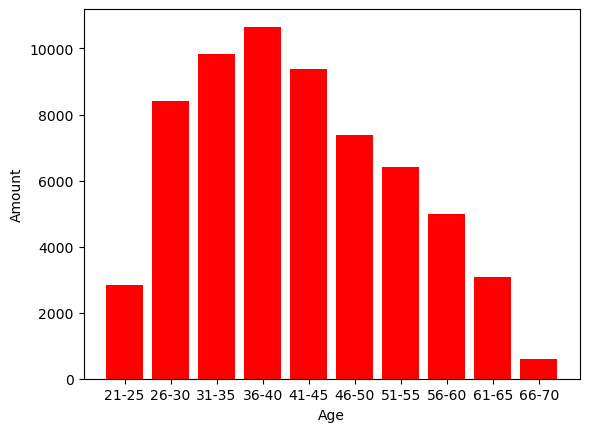

In [191]:
agebin=data.groupby(['AGEBIN'],as_index=False)['YEAR'].count()

plt.bar(agebin['AGEBIN'], agebin['YEAR'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Amount')

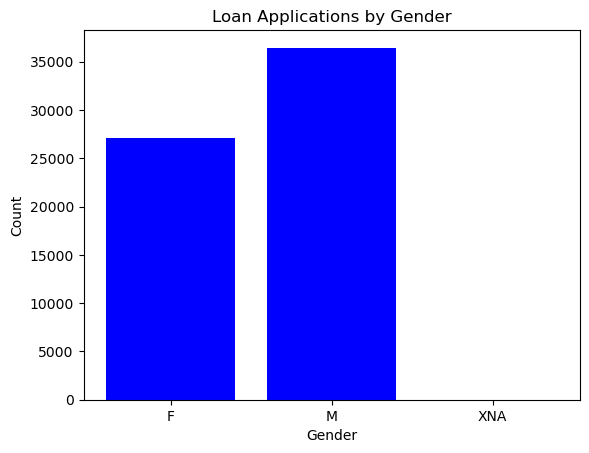

In [192]:
gender = data.groupby('CODE_GENDER').size().reset_index(name='Count')

plt.bar(gender['CODE_GENDER'], gender['Count'], color='blue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Applications by Gender')
plt.show()

/var/folders/zs/rrjkw77s6nb6hr1llg5zlw6r0000gn/T/ipykernel_858/651266375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income = data.groupby('INCOMEBIN').size().reset_index(name='Count')


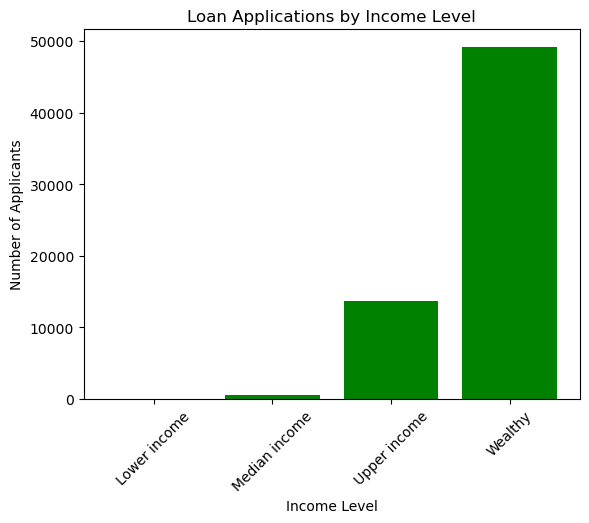

In [193]:
income = data.groupby('INCOMEBIN').size().reset_index(name='Count')

plt.bar(income['INCOMEBIN'], income['Count'], color='green')
plt.xlabel('Income Level')
plt.ylabel('Number of Applicants')
plt.title('Loan Applications by Income Level')
plt.xticks(rotation=45)
plt.show()

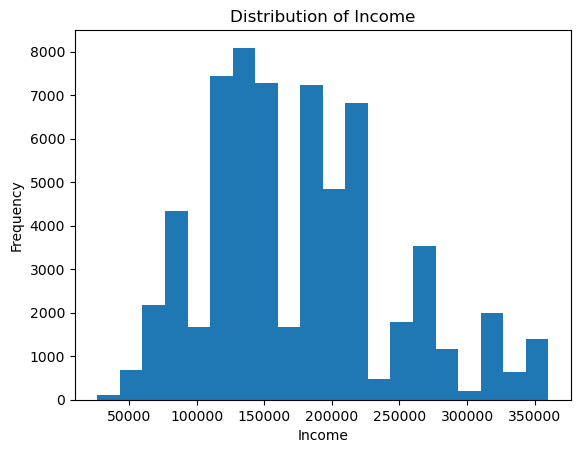

In [194]:
plt.hist(data['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

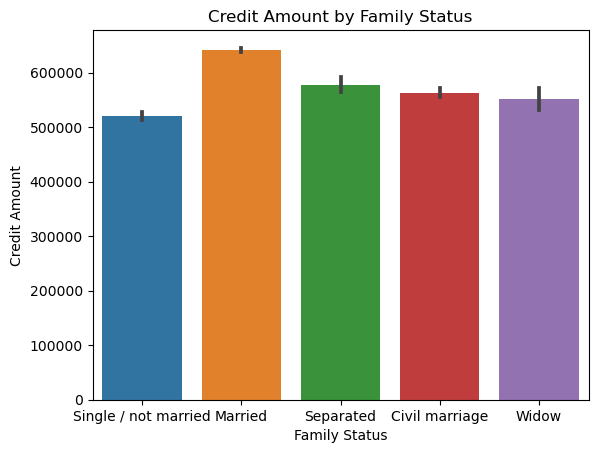

In [195]:
sb.barplot(x='NAME_FAMILY_STATUS', y='AMT_CREDIT', data=data)
plt.xlabel('Family Status')
plt.ylabel('Credit Amount')
plt.title('Credit Amount by Family Status')
plt.show()

# Visualizations of Customers in Late

In [196]:
data['LATEORNOT'] = data['TARGET'].map({0: 'Always On Time', 1: 'Late Payment'})

In [197]:
late_payment_prob = (
    data.groupby('INCOMEBIN')['LATEORNOT']
    .value_counts(normalize=True)
    .loc[:, 'Late Payment'])

/var/folders/zs/rrjkw77s6nb6hr1llg5zlw6r0000gn/T/ipykernel_858/156523943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('INCOMEBIN')['LATEORNOT']


In [198]:
late_payment_prob

INCOMEBIN
Lower income     0.059701
Median income    0.057725
Upper income     0.076570
Wealthy          0.073774
Name: proportion, dtype: float64

Use the income level to see the amount of late payment

In [199]:
data.groupby('INCOMEBIN')['LATEORNOT'].value_counts()

/var/folders/zs/rrjkw77s6nb6hr1llg5zlw6r0000gn/T/ipykernel_858/1504390424.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('INCOMEBIN')['LATEORNOT'].value_counts()


INCOMEBIN      LATEORNOT     
Lower income   Always On Time       63
               Late Payment          4
Median income  Always On Time      555
               Late Payment         34
Upper income   Always On Time    12687
               Late Payment       1052
Wealthy        Always On Time    45524
               Late Payment       3626
Name: count, dtype: int64

The probability of each income level having a late payment => There is no significant difference between income levels.

In [200]:
late_payment_prob = data.groupby('INCOMEBIN')['LATEORNOT'].value_counts(normalize=True).loc[:, 'Late Payment']
print(late_payment_prob)

INCOMEBIN
Lower income     0.059701
Median income    0.057725
Upper income     0.076570
Wealthy          0.073774
Name: proportion, dtype: float64


/var/folders/zs/rrjkw77s6nb6hr1llg5zlw6r0000gn/T/ipykernel_858/1051948759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_payment_prob = data.groupby('INCOMEBIN')['LATEORNOT'].value_counts(normalize=True).loc[:, 'Late Payment']


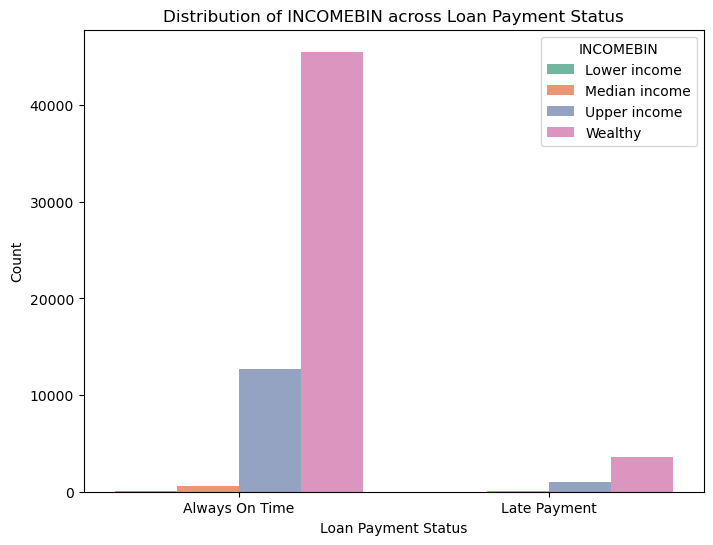

In [201]:
plt.figure(figsize=(8, 6))
sb.countplot(data=data, x='LATEORNOT', hue='INCOMEBIN', palette='Set2')
plt.xlabel('Loan Payment Status')
plt.ylabel('Count')
plt.title('Distribution of INCOMEBIN across Loan Payment Status')
plt.legend(title='INCOMEBIN')
plt.show()

Use the income type to see the amount of late payment

In [202]:
data.groupby('NAME_INCOME_TYPE')['LATEORNOT'].value_counts()

NAME_INCOME_TYPE      LATEORNOT     
Businessman           Always On Time        1
Commercial associate  Always On Time    15008
                      Late Payment       1074
Pensioner             Always On Time     6023
                      Late Payment        319
State servant         Always On Time     4201
                      Late Payment        250
Student               Always On Time        3
Unemployed            Always On Time        4
                      Late Payment          1
Working               Always On Time    33589
                      Late Payment       3072
Name: count, dtype: int64

In [203]:
late_payment_prob = data.groupby('NAME_INCOME_TYPE')['LATEORNOT'].value_counts(normalize=True).loc[:, 'Late Payment']
print(late_payment_prob)

NAME_INCOME_TYPE
Commercial associate    0.066783
Pensioner               0.050300
State servant           0.056167
Unemployed              0.200000
Working                 0.083795
Name: proportion, dtype: float64


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

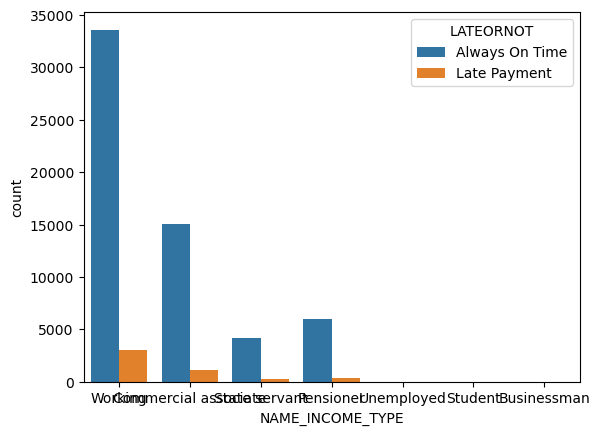

In [204]:
sb.countplot(data=data, x='NAME_INCOME_TYPE', hue='LATEORNOT')

Use the gender to see the amount of late payment

In [205]:
data.groupby('CODE_GENDER')['LATEORNOT'].value_counts()

CODE_GENDER  LATEORNOT     
F            Always On Time    25484
             Late Payment       1603
M            Always On Time    33343
             Late Payment       3113
XNA          Always On Time        2
Name: count, dtype: int64

In [206]:
late_payment_prob = data.groupby('CODE_GENDER')['LATEORNOT'].value_counts(normalize=True).loc[:, 'Late Payment']
print(late_payment_prob)

CODE_GENDER
F    0.059180
M    0.085391
Name: proportion, dtype: float64


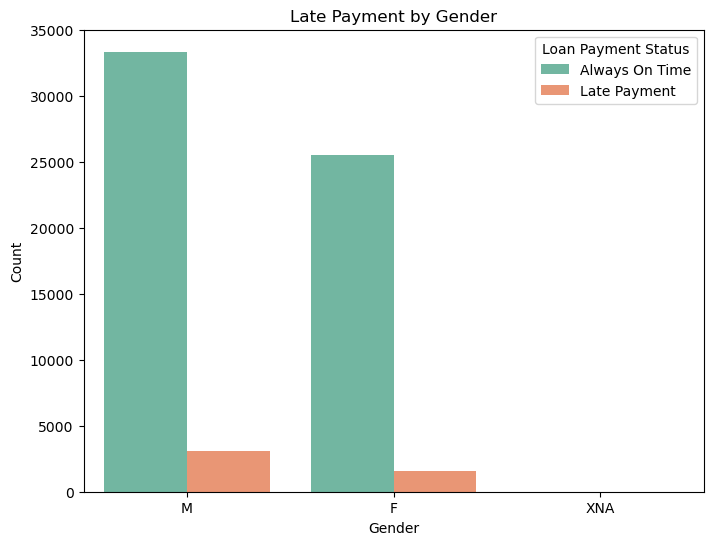

In [207]:
plt.figure(figsize=(8, 6))
sb.countplot(data=data, x='CODE_GENDER', hue='LATEORNOT', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Late Payment by Gender')
plt.legend(title='Loan Payment Status')
plt.show()

Use the amount of credits to observe the late payment => The results show that low credit does not represent the probability of delayed payment. The median credit of late payment or on-time payment is similar.

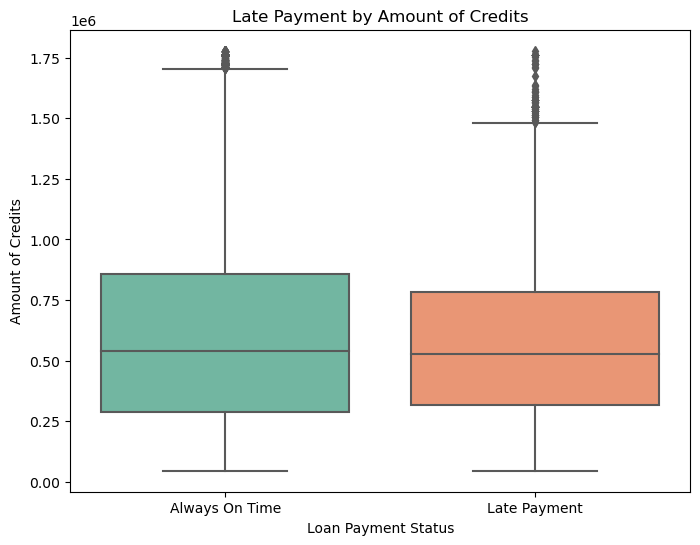

In [208]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='LATEORNOT', y='AMT_CREDIT', data=data, palette='Set2')
plt.xlabel('Loan Payment Status')
plt.ylabel('Amount of Credits')
plt.title('Late Payment by Amount of Credits')
plt.show()

# Prepare the data for a regression analysis

In [209]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

Set TARGET to be our dependent variable to analyze and drop the categorical value, adding the get_dummies columns.

In [210]:
X=data

In [211]:
X=X.drop(["AGEBIN"], axis=1)
X=X.drop(["LATEORNOT"], axis=1)

In [212]:
X = pd.get_dummies(X)
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,INCOMEBIN_Lower income,INCOMEBIN_Median income,INCOMEBIN_Upper income,INCOMEBIN_Wealthy
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260,-2531,26.0,...,False,False,False,False,False,False,False,False,True,False
6,1,171000.0,1560726.0,41301.0,1395000.0,-13778,-3130,-1213,-619,17.0,...,False,False,False,False,False,False,False,False,False,True
7,0,360000.0,1530000.0,42075.0,1530000.0,-18850,-449,-4597,-2379,8.0,...,False,False,False,False,False,False,False,False,False,True
13,1,225000.0,918468.0,28966.5,697500.0,-14086,-3028,-643,-4911,23.0,...,False,False,False,False,False,False,False,False,False,True
15,0,157500.0,299772.0,20160.0,247500.0,-8728,-1157,-3494,-1368,17.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214064,0,202500.0,848745.0,43465.5,675000.0,-17966,-3149,-3684,-1510,4.0,...,False,False,False,False,False,False,False,False,False,True
214066,0,135000.0,945000.0,27630.0,945000.0,-19861,-1983,-5379,-661,8.0,...,False,False,False,False,False,False,False,False,False,True
214070,0,135000.0,986553.0,28975.5,823500.0,-20873,365243,-8850,-4121,9.0,...,False,False,False,False,False,True,False,False,False,True
214073,1,189000.0,1144737.0,45526.5,1053000.0,-14403,-4721,-2988,-4743,30.0,...,False,False,False,False,False,False,False,False,False,True


In [213]:
X= X.drop(["TARGET"],axis=1)
y = data["TARGET"]

# Regression Analysis

In [214]:
lr = LogisticRegression()

In [215]:
lr.fit(X,y)

LogisticRegression()

In [216]:
lr.score(X,y)

0.9257848768589189

In [217]:
pred = lr.predict(X)

In [218]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,pred),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes     58829        0
actual:no       4716        0


In [219]:
lr=LogisticRegression(class_weight='balanced',solver='lbfgs')
lr.fit(X,y)
lr.score(X,y)

0.6058541191281769

In [220]:
pred = lr.predict(X)

In [221]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,pred),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes     35944    22885
actual:no       2161     2555
